In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import tkinter as tk
from tkinter import ttk
from datetime import datetime
from IPython.display import clear_output

In [2]:
growth_data_path = "F:\\Farm Data\Growth Model\growth_db.csv"
weather_data_path = "F:\\Farm Data\Growth Model\weather_db.csv"
field_data_path = "F:\\Farm Data\Growth Model\\field_db.csv"
growth_data = pd.read_csv(growth_data_path)
weather_data = pd.read_csv(weather_data_path)
field_data = pd.read_csv(field_data_path)

In [3]:
weather_data['date'] = pd.to_datetime(weather_data['date'], format='%d/%m/%Y')
weather_data['time'] = pd.to_datetime(weather_data['time'], format='%H:%M:%S')
weather_data['day'] = weather_data.date.dt.day
weather_data['month'] = weather_data.date.dt.month
weather_data['day_month'] = weather_data['day'].astype(str) + " - " + weather_data['month'].astype(str)

min_grow_temp = 5

weather_data['heat_units'] = weather_data['avg_temp'] - min_grow_temp
weather_data['heat_units'] = np.where((weather_data['heat_units'] < 0), 0, weather_data['heat_units']/24)

In [4]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61512 entries, 0 to 61511
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             61512 non-null  datetime64[ns]
 1   time             61512 non-null  datetime64[ns]
 2   avg_temp         61512 non-null  float64       
 3   rh               61512 non-null  float64       
 4   rain             61512 non-null  float64       
 5   solar_radiation  61512 non-null  int64         
 6   wind_speed       60962 non-null  float64       
 7   bat_volt         60962 non-null  float64       
 8   leaf_wet         60962 non-null  float64       
 9   dew_point        60962 non-null  float64       
 10  day              61512 non-null  int64         
 11  month            61512 non-null  int64         
 12  day_month        61512 non-null  object        
 13  heat_units       61512 non-null  float64       
dtypes: datetime64[ns](2), float64(8), int6

In [5]:
weather_data.head()

,date,time,avg_temp,rh,rain,solar_radiation,wind_speed,bat_volt,leaf_wet,dew_point,day,month,day_month,heat_units
0,2014-05-14,1900-01-01 14:00:00,16.2,55.9,0.0,205,2.7,6904.0,0.0,7.2,14,5,14 - 5,0.466667
1,2014-05-14,1900-01-01 15:00:00,17.4,51.2,0.0,544,2.2,6952.0,0.0,7.0,14,5,14 - 5,0.516667
2,2014-05-14,1900-01-01 16:00:00,17.7,48.9,0.0,387,2.1,6922.0,0.0,6.6,14,5,14 - 5,0.529167
3,2014-05-14,1900-01-01 17:00:00,17.9,48.9,0.0,274,2.0,6904.0,0.0,6.7,14,5,14 - 5,0.537500
4,2014-05-14,1900-01-01 18:00:00,17.2,51.0,0.0,104,1.7,6894.0,0.0,6.7,14,5,14 - 5,0.508333


In [6]:
growth_data['sample_date'] = pd.to_datetime(growth_data['sample_date'], format='%d/%m/%Y')

summary_data = growth_data

In [7]:
growth_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74590 entries, 0 to 74589
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   sample_date  74590 non-null  datetime64[ns]
 1   field        74590 non-null  object        
 2   zone         74590 non-null  int64         
 3   diameter     74590 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 2.3+ MB


In [8]:
growth_data.head()

,sample_date,field,zone,diameter
0,2019-07-17,Allans 18,1,4.0
1,2019-07-17,Allans 18,1,3.0
2,2019-07-17,Allans 18,1,5.0
3,2019-07-17,Allans 18,1,5.0
4,2019-07-17,Allans 18,1,3.0


In [9]:
field_data['planting_date'] = pd.to_datetime(field_data['planting_date'], format='%d/%m/%Y')
field_data["zone"] = field_data["zone"].astype(str)
field_data["fieldzone"] = field_data["field"] + field_data["zone"]

In [10]:
field_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   field           503 non-null    object        
 1   zone            503 non-null    object        
 2   planting_date   503 non-null    datetime64[ns]
 3   variety         503 non-null    object        
 4   method          503 non-null    object        
 5   inputs          503 non-null    object        
 6   protection      503 non-null    object        
 7   planting_rate   503 non-null    int64         
 8   sand            503 non-null    int64         
 9   silt            503 non-null    int64         
 10  clay            503 non-null    int64         
 11  organic_matter  503 non-null    float64       
 12  fieldzone       503 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(7)
memory usage: 51.2+ KB


In [11]:
field_data.head()

,field,zone,planting_date,variety,method,inputs,protection,planting_rate,sand,silt,clay,organic_matter,fieldzone
0,Allans 07,1,2019-04-01,Krypton,Drilled,Conventional,Barley,249820,39,37,24,29.6,Allans 071
1,Allans 07,2,2019-04-01,Krypton,Drilled,Conventional,Barley,249820,39,37,24,29.6,Allans 072
2,Allans 07,3,2019-04-01,Longton,Drilled,Conventional,Barley,256524,39,37,24,29.6,Allans 073
3,Allans 07,4,2019-04-01,Longton,Drilled,Conventional,Barley,256524,39,37,24,29.6,Allans 074
4,Allans 07,5,2019-04-01,Batter,Drilled,Conventional,Barley,247048,39,37,24,29.6,Allans 075


In [12]:
summary_data["zone"] = summary_data["zone"].astype(str)
summary_data["fieldzone"] = summary_data["field"] + summary_data["zone"]
summary_data['fieldzonedate'] = summary_data['fieldzone'] + summary_data['sample_date'].astype(str)

summary_data = summary_data.set_index('fieldzone').join(field_data.set_index('fieldzone'), rsuffix = '_join')

summary_data['heat_units'] = 0
summary_data['solar_radiation'] = 0

In [13]:
summary_data = summary_data.reset_index(inplace=False)
summary_data = summary_data.drop(columns=['field_join', 'zone_join'], inplace=False)

In [14]:
def cum_heat_units(start, finish, weather_data = weather_data):
    df = weather_data.loc[(weather_data['date'] > start) & (weather_data['date'] < finish), ['heat_units']]
    total_hu = df['heat_units'].sum()
    return total_hu

def cum_solar_radiation(start, finish, weather_data = weather_data):
    df = weather_data.loc[(weather_data['date'] > start) & (weather_data['date'] < finish), ['solar_radiation']]
    total_sr = df['solar_radiation'].sum()
    return total_sr

In [15]:
summary_data.head()

,fieldzone,sample_date,field,zone,diameter,fieldzonedate,planting_date,variety,method,inputs,protection,planting_rate,sand,silt,clay,organic_matter,heat_units,solar_radiation
0,Allans 071,2019-07-18,Allans 07,1,3.0,Allans 0712019-07-18,2019-04-01,Krypton,Drilled,Conventional,Barley,249820,39,37,24,29.6,0,0
1,Allans 071,2019-07-18,Allans 07,1,9.0,Allans 0712019-07-18,2019-04-01,Krypton,Drilled,Conventional,Barley,249820,39,37,24,29.6,0,0
2,Allans 071,2019-07-18,Allans 07,1,9.0,Allans 0712019-07-18,2019-04-01,Krypton,Drilled,Conventional,Barley,249820,39,37,24,29.6,0,0
3,Allans 071,2019-07-18,Allans 07,1,8.0,Allans 0712019-07-18,2019-04-01,Krypton,Drilled,Conventional,Barley,249820,39,37,24,29.6,0,0
4,Allans 071,2019-07-18,Allans 07,1,12.0,Allans 0712019-07-18,2019-04-01,Krypton,Drilled,Conventional,Barley,249820,39,37,24,29.6,0,0


In [16]:
summary_data_avg = summary_data.groupby(['fieldzonedate']).agg({'diameter' : ['mean', 'std', 'count'],
                                                                'method' : ['first'],
                                                                'inputs' : ['first'],
                                                                'variety' : ['first'],
                                                                'protection' : ['first'],
                                                                'sand' : ['mean'],
                                                                'silt' : ['mean'],
                                                                'clay' : ['mean'],
                                                                'organic_matter' : ['mean'],
                                                                'planting_date' : ['first'],
                                                                'sample_date' : ['first'],
                                                                'fieldzone' : ['first']}).reset_index()

summary_data_avg.columns = ['fieldzonedate',
                            'mean_diameter',
                            'std_dev_diameter',
                            'pp2m2', 'method',
                            'inputs',
                            'variety',
                            'protection',
                            'sand',
                            'silt',
                            'clay',
                            'organic_matter',
                            'planting_date',
                            'sample_date',
                            'fieldzone']

stripping_coef = 0.92

summary_data_avg['d_lin'] = (summary_data_avg['mean_diameter']*stripping_coef)**0.625
summary_data_avg['heat_units'] = 0
summary_data_avg['solar_radiation'] = 0

summary_data_avg.head()

,fieldzonedate,mean_diameter,std_dev_diameter,pp2m2,method,inputs,variety,protection,sand,silt,clay,organic_matter,planting_date,sample_date,fieldzone,d_lin,heat_units,solar_radiation
0,Allans 0712019-07-18,7.266667,3.387141,45,Drilled,Conventional,Krypton,Barley,39,37,24,29.6,2019-04-01,2019-07-18,Allans 071,3.278702,0,0
1,Allans 0712019-08-29,20.673913,5.865357,46,Drilled,Conventional,Krypton,Barley,39,37,24,29.6,2019-04-01,2019-08-29,Allans 071,6.302409,0,0
2,Allans 0712019-10-29,38.095238,8.014650,42,Drilled,Conventional,Krypton,Barley,39,37,24,29.6,2019-04-01,2019-10-29,Allans 071,9.234461,0,0
3,Allans 0712020-01-13,38.283333,11.416225,42,Drilled,Conventional,Krypton,Barley,39,37,24,29.6,2019-04-01,2020-01-13,Allans 071,9.262932,0,0
4,Allans 0722019-07-18,7.106383,2.837896,47,Drilled,Conventional,Krypton,Barley,39,37,24,29.6,2019-04-01,2019-07-18,Allans 072,3.233313,0,0


In [17]:
for i in summary_data_avg.index:
    clear_output(wait=True)
    planting_date = summary_data_avg['planting_date'][i]
    sample_date = summary_data_avg['sample_date'][i]
    summary_data_avg['heat_units'][i] = cum_heat_units(planting_date, sample_date)
    print("Current Progress:", np.round(i/len(summary_data_avg)*100,0),"%")

Current Progress: 100.0 %


In [18]:
for i in summary_data_avg.index:
    clear_output(wait=True)
    planting_date = summary_data_avg['planting_date'][i]
    sample_date = summary_data_avg['sample_date'][i]
    summary_data_avg['solar_radiation'][i] = cum_solar_radiation(planting_date, sample_date)
    print("Current Progress:", np.round(i/len(summary_data_avg)*100,0),"%")

Current Progress: 100.0 %


In [19]:
X = summary_data_avg.drop(['d_lin',
                           'mean_diameter',
                           'std_dev_diameter',
                           'fieldzonedate',
                           'sample_date',
                           'planting_date',
                           'sand',
                           'silt',
                           'clay',
                           'fieldzone'], axis = 1)

y = summary_data_avg['d_lin']

<AxesSubplot:xlabel='mean_diameter', ylabel='Density'>

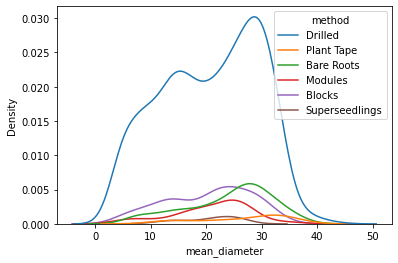

In [20]:
sns.kdeplot(x = 'mean_diameter', data = summary_data_avg, hue = 'method')

In [21]:
X = pd.get_dummies(X, columns = ['method',
                                 'inputs',
                                 'variety',
                                 'protection'], drop_first = True)

In [22]:
from sklearn.ensemble import IsolationForest

print(f"The old training dataframe shape: {X.shape}")

iso = IsolationForest(random_state = 10)
preds = iso.fit_predict(X)

totalOutliers=0

for pred in preds:
    if pred == -1:
        totalOutliers=totalOutliers+1
        
print("Total number of outliers identified is: ",totalOutliers)

The old training dataframe shape: (1870, 37)
Total number of outliers identified is:  71


In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

reg = LinearRegression().fit(X_scaled, y)
preds = reg.predict(X_scaled)
summary_data_avg['preds'] = preds
reg.score(X_scaled, y)

0.8549083016519852

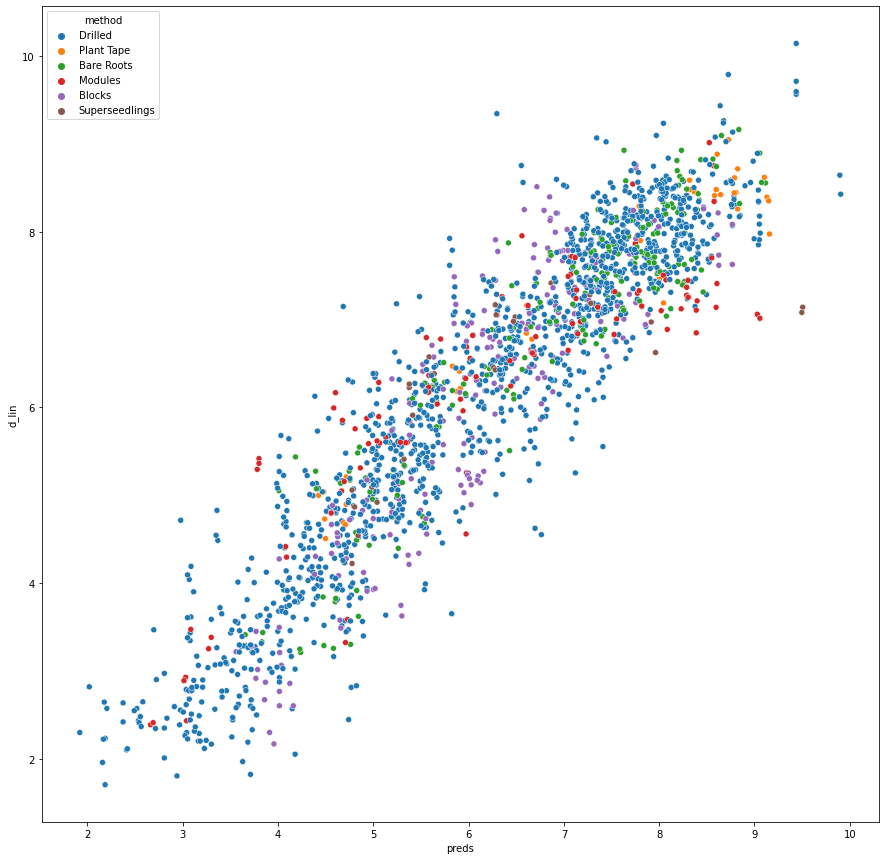

In [24]:
plt.figure(figsize=(15,15))
sns.scatterplot(x = 'preds', y = 'd_lin', data = summary_data_avg, hue = 'method')
plt.show()

In [25]:
coef_list = list(reg.coef_)
var_list = list(X)

reg_coef_df = pd.DataFrame({'variable': var_list,
                            'coef': coef_list}, columns=['variable',
                                                         'coef'])

reg_coef_df

,variable,coef
0,pp2m2,0.085858
1,organic_matter,0.474017
2,heat_units,1.868099
3,solar_radiation,0.229524
4,method_Blocks,-0.200406
5,method_Drilled,-1.230941
6,method_Modules,0.013639
7,method_Plant Tape,-0.167604
8,method_Superseedlings,-0.016214
9,inputs_Conventional,0.499138


In [26]:
X_1 = summary_data_avg.drop(['d_lin',
                             'mean_diameter',
                             'std_dev_diameter',
                             'fieldzonedate',
                             'sample_date',
                             'planting_date',
                             'preds',
                             'sand',
                             'silt',
                             'clay',
                             'fieldzone'], axis = 1)

X_1['growth_units'] = X_1['solar_radiation']*X_1['heat_units']

X_1 = X_1.drop(['heat_units',
                'solar_radiation'], axis = 1)

y_1 = summary_data_avg['mean_diameter']

In [27]:
X_1 = pd.get_dummies(X_1, columns = ['method',
                                     'inputs',
                                     'variety',
                                     'protection'], drop_first = True)

In [28]:
X_1_scaled = scaler.fit_transform(X_1)

reg = LinearRegression().fit(X_1_scaled, y_1)
preds = reg.predict(X_1_scaled)

summary_data_avg['preds'] = preds

reg.score(X_1_scaled, y_1)

0.7818028445762252

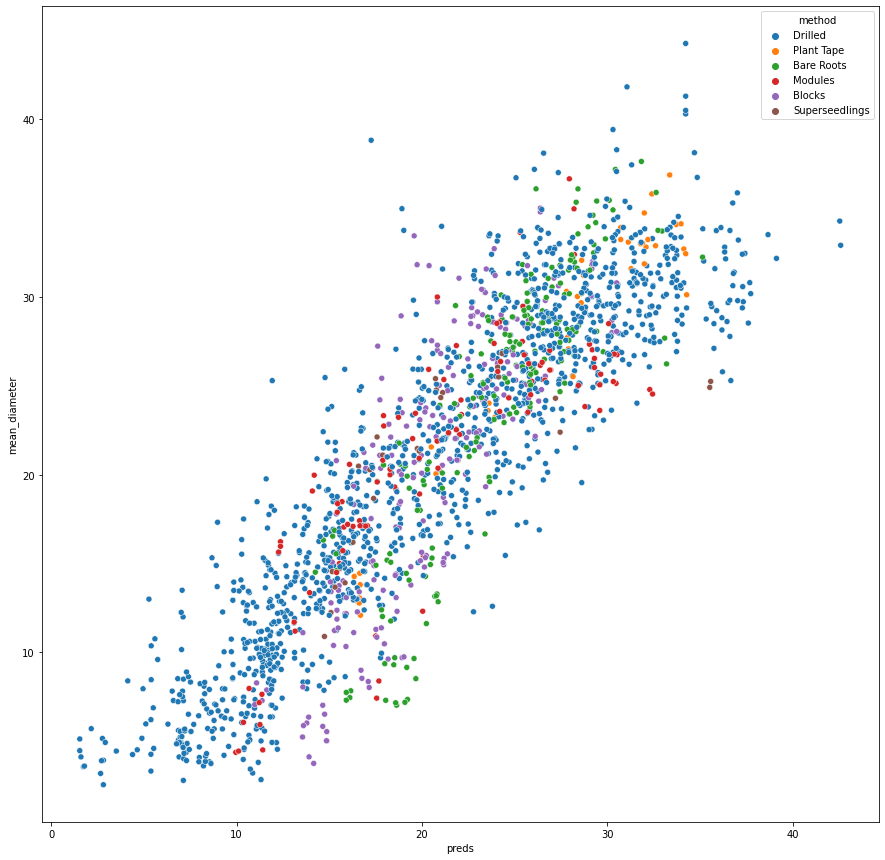

In [29]:
plt.figure(figsize=(15,15))
sns.scatterplot(x = 'preds', y = 'mean_diameter', data = summary_data_avg, hue = 'method')
plt.show()

In [30]:
coef_list = list(reg.coef_)
var_list = list(X_1)

reg_coef_df = pd.DataFrame({'variable': var_list,
                            'coef': coef_list}, columns=['variable',
                                                         'coef'])

reg_coef_df

,variable,coef
0,pp2m2,0.474171
1,organic_matter,2.489449
2,growth_units,9.559484
3,method_Blocks,-2.509012
4,method_Drilled,-7.638248
5,method_Modules,-0.378584
6,method_Plant Tape,-0.751070
7,method_Superseedlings,-0.331657
8,inputs_Conventional,1.686513
9,inputs_Organic,0.153338


In [31]:
variety_list = list(set(summary_data_avg['variety'].values.tolist()))
variety_list.sort()
method_list = list(set(summary_data_avg['method'].values.tolist()))
method_list.sort()
inputs_list = list(set(summary_data_avg['inputs'].values.tolist()))
inputs_list.sort()
protection_list = list(set(summary_data_avg['protection'].values.tolist()))
protection_list.sort()
fieldzone_list = list(set(summary_data_avg['fieldzone'].values.tolist()))
fieldzone_list.sort()
growth_units_list = []
r2_list = []

In [32]:
def model_and_calc(fieldzone):
    try:
        organic_matter = summary_data_avg.loc[summary_data_avg['fieldzone']==fieldzone, 'organic_matter'].iloc[0]
        variety = summary_data_avg.loc[summary_data_avg['fieldzone']==fieldzone, 'variety'].iloc[0]
        pp2m2 = summary_data_avg.loc[summary_data_avg['fieldzone']==fieldzone, 'pp2m2'].iloc[0]
        protection = summary_data_avg.loc[summary_data_avg['fieldzone']==fieldzone, 'protection'].iloc[0]
        inputs = summary_data_avg.loc[summary_data_avg['fieldzone']==fieldzone, 'inputs'].iloc[0]
        method = summary_data_avg.loc[summary_data_avg['fieldzone']==fieldzone, 'method'].iloc[0]
        solar_radiation = summary_data_avg.loc[summary_data_avg['fieldzone']==fieldzone, 'solar_radiation'].iloc[0]
        heat_units = summary_data_avg.loc[summary_data_avg['fieldzone']==fieldzone, 'heat_units'].iloc[0]
        mean_diameter = summary_data_avg.loc[summary_data_avg['fieldzone']==fieldzone, 'mean_diameter'].iloc[0]


        filtered_leek_data = summary_data_avg[filtered_leek_data['variety'].str.contains(variety)]
        filtered_leek_data = filtered_leek_data[filtered_leek_data['inputs'].str.contains(inputs)]
        filtered_leek_data = filtered_leek_data[filtered_leek_data['protection'].str.contains(protection)]
        filtered_leek_data = filtered_leek_data[filtered_leek_data['method'].str.contains(method)]


        x = filtered_leek_data[['pp2m2','organic_matter','solar_radiation', 'heat_units']]
        y = filtered_leek_data[['mean_diameter']]
        x = sm.add_constant(x)
        model = sm.OLS(y,x)
        leek_model = model.fit()
        summary = leek_model.summary()
        constant = leek_model.params.const
        coef_pp2m2 = leek_model.params.pp2m2
        coef_organic_matter = leek_model.params.organic_matter
        coef_solar_radiation = leek_model.params.solar_radiation
        coef_heat_units = leek_model.params.heat_units

        if inputs == "Baby":
            target_diameter = 16**0.625*10
        elif inputs == "Conventional":
            target_diameter = 35**0.625*10
        elif inputs == "Organic":
            target_diameter = 28**0.625*10
        r2 = round(leek_model.rsquared,2)
        growth_units = abs(round(constant 
                                 + (pp2m2 * coef_pp2m2) 
                                 + (organic_matter * coef_organic_matter) 
                                 - target_diameter, 2)) 
        growth_units_list.append(growth_units)
        r2_list.append(r2)
    except:
        growth_units_list.append(0)
        r2_list.append(0)
        print(f"\n{fieldzone}")


for fieldzone in fieldzone_list:
        model_and_calc(fieldzone)


predictions = {'fieldzone':fieldzone_list,'growth_units':growth_units_list,'r2':r2_list}
df = pd.DataFrame(predictions, columns = ['fieldzone', 'growth_units', 'r2'])
df.to_excel(r'F:\Farm Data\Growth Model\test.xlsx', index = False, header = True)


Allans 071

Allans 072

Allans 073

Allans 074

Allans 075

Allans 076

Allans 121

Allans 122

Allans 123

Allans 124

Allans 16/171

Allans 16/172

Allans 16/173

Allans 16/174

Allans 16/175

Allans 16/176

Allans 181

Allans 182

Allans 183

Allans 184

Allans 185

Allans 186

Allans 187

Allans 188

Allans 223

Allans 224

Angoods 11

Angoods 12

Angoods 13

Angoods 14

Angoods 15

Angoods 16

Angoods 17

Angoods 41

Angoods 42

Chatteris Farms 07/081

Chatteris Farms 07/082

Chatteris Farms 07/083

Chatteris Farms 07/084

Chatteris Farms 27A1

Chatteris Farms 27A2

Chatteris Farms 27A3

Chatteris Farms 27A4

Chatteris Farms 27B1

Chatteris Farms 27B2

Chatteris Farms 27B3

Chatteris Farms 27B4

Garretts Decoy 31

Garretts Decoy 32

Garretts Decoy 33

Garretts Decoy 34

Garretts Decoy 41

Garretts Decoy 42

Garretts Decoy 43

Garretts Decoy 44

Garretts Decoy 61

Garretts Decoy 62

Garretts Decoy 63

Garretts Decoy 64

Garretts Decoy 71

Garretts Decoy 72

Garretts Decoy 73

Garr

In [33]:
def filter_data(data, method, inputs, variety, protection):
    
    filtered = data[data['variety'].str.contains(variety)]
    filtered = filtered[filtered['inputs'].str.contains(inputs)]
    filtered = filtered[filtered['protection'].str.contains(protection)]
    filtered = filtered[filtered['method'].str.contains(method)]
    return filtered

In [34]:
def predict_heat(start, finish, data = weather_data):
    
    df1 = weather_data.loc[(weather_data['date'] > start) & (weather_data['date'] < finish), ['heat_units']]
    actual_hu = df1['heat_units'].sum()
    
    weather_data_avg = summary_data.groupby(['day_month']).agg({'heat_units' : ['mean']}).reset_index()
    weather_data_avg.columns = ['mean_heat_units']
    
    ###MAKE HEAT PREDICTIONS???
    
    total_hu = actual_hu + predicted_hu
    return total_hu